ML CL1 pr - 5
Ensemble Learning 
B. Use different voting mechanism and Apply AdaBoost 
(Adaptive Boosting), Gradient Tree Boosting (GBM), XGBoost 
classification on Iris dataset and compare the performance of 
three models using different evaluation measures. Dataset 
Link: https://www.kaggle.com/datasets/uciml/iris  

In [1]:
!pip install xgboost scikit-learn


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   - -------------------------------------- 2.1/56.8 MB 10.7 MB/s eta 0:00:06
   -- ------------------------------------- 4.2/56.8 MB 10.5 MB/s eta 0:00:06
   ---- ----------------------------------- 6.3/56.8 MB 10.4 MB/s eta 0:00:05
   ----- ---------------------------------- 8.1/56.8 MB 10.1 MB/s eta 0:00:05
   ------ --------------------------------- 8.7/56.8 MB 8.4 MB/s eta 0:00:06
   ------- -------------------------------- 10.2/56.8 MB 8.3 MB/s eta 0:00:06
   -------- ------------------------------- 12.3/56.8 MB 8.5 MB/s eta 0:00:06
   --------- ------------------------------ 13.9/56.8 MB 8.6 MB/s eta 0:00:06
   ----------- ---------------------------- 15.7/56.8 MB 8.5 MB/s eta 0:00:05
   ------------ --------------------------- 17.8/56.8 MB 8.6 MB/s eta 0:00:05
   -------------- ------------------------- 19.9/56.8 MB 8.7 MB/s eta 0:00:05
   --------------- ------------------------ 21.8/56.8 MB 8.7 MB/s eta 0:0


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
# Define base models
clf1 = LogisticRegression()
clf2 = SVC(probability=True)  # Needed for soft voting
clf3 = DecisionTreeClassifier()

# Hard Voting
voting_hard = VotingClassifier(estimators=[
    ('lr', clf1), ('svc', clf2), ('dt', clf3)
], voting='hard')

# Soft Voting
voting_soft = VotingClassifier(estimators=[
    ('lr', clf1), ('svc', clf2), ('dt', clf3)
], voting='soft')

# Fit and evaluate
for clf, label in zip([voting_hard, voting_soft], ['Hard Voting', 'Soft Voting']):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'\n🔹 {label} Classifier')
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



🔹 Hard Voting Classifier
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


🔹 Soft Voting Classifier
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [7]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("\n🔹 AdaBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))



🔹 AdaBoost Classifier
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [8]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

print("\n🔹 Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))



🔹 Gradient Boosting Classifier
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [9]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\n🔹 XGBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))



🔹 XGBoost Classifier
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



C:\Users\Vaishali Pawar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:22:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [10]:
models = ['Hard Voting', 'Soft Voting', 'AdaBoost', 'GradientBoosting', 'XGBoost']
accuracies = [
    accuracy_score(y_test, voting_hard.predict(X_test)),
    accuracy_score(y_test, voting_soft.predict(X_test)),
    accuracy_score(y_test, y_pred_ada),
    accuracy_score(y_test, y_pred_gbm),
    accuracy_score(y_test, y_pred_xgb)
]

comparison_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
comparison_df.sort_values(by='Accuracy', ascending=False, inplace=True)
print("\n🔸 Model Accuracy Comparison")
print(comparison_df)



🔸 Model Accuracy Comparison
              Model  Accuracy
0       Hard Voting  0.966667
1       Soft Voting  0.966667
3  GradientBoosting  0.966667
2          AdaBoost  0.933333
4           XGBoost  0.933333


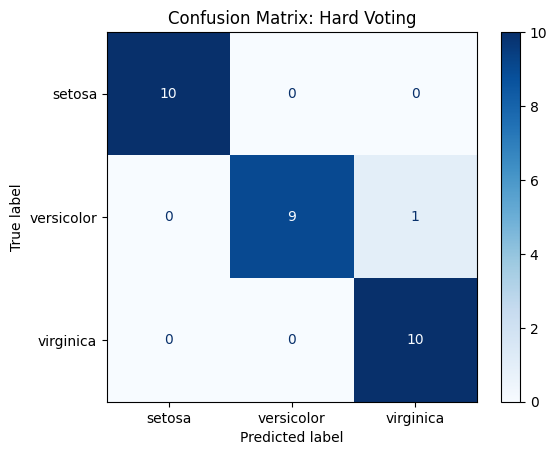

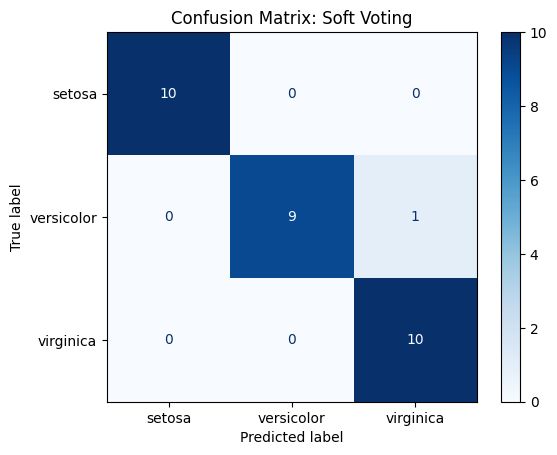

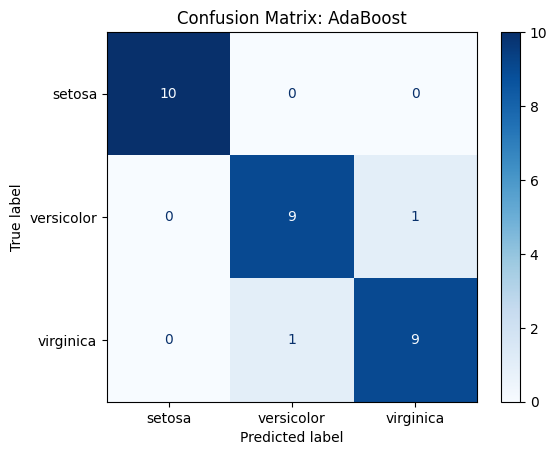

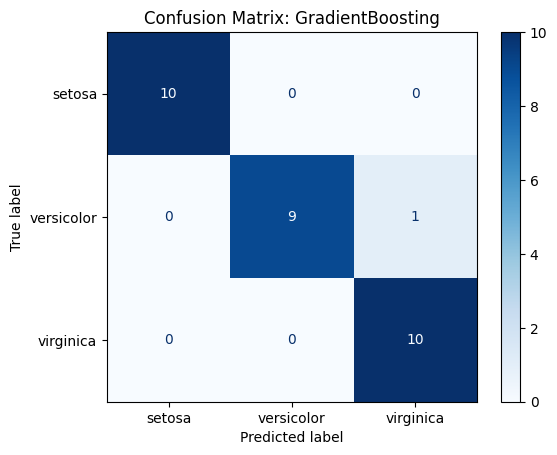

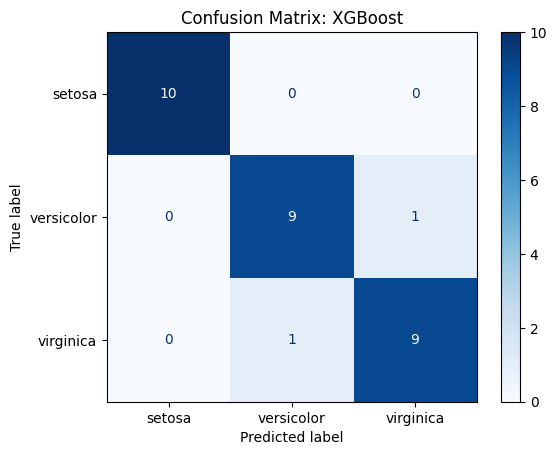

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

models_dict = {
    "Hard Voting": voting_hard,
    "Soft Voting": voting_soft,
    "AdaBoost": ada,
    "GradientBoosting": gbm,
    "XGBoost": xgb
}

for name, model in models_dict.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()
